# Generate a lens using <span style="font-family:Consolas; font-size:1em;">SLIT</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
import scipy.signal as scp

import SLIT
import SLIT.Lens as Lens

%matplotlib inline

### Source setup

In [2]:
# Source light profile
source = pf.open('SLIT_images/source.fits')[0].data
print(source.shape)

(100, 100)


### PSF setup

In [3]:
# N1,N2 are the numbers of pixels in the image plane.
num_pix = 100
nt1 = num_pix
nt2 = num_pix

# Size ratio of the source to image number of pixels 
size = 1

#PSF
PSF0 = pf.open('SLIT_images/PSF.fits')[0].data
PSF = PSF0[1:,1:]
PSFconj = np.real(np.fft.ifft2(np.conjugate(np.fft.fft2(PSF0[:-1,:-1]))))
PSFconj = PSFconj/np.sum(PSFconj)
PSF = PSF/np.sum(PSF)
print(PSF.shape)

(73, 73)


In [4]:
# Compute the convergence kappa
b = 30
xc = 1
q = 0.7
betata = 2
thetata = #25
center_x, center_y = nt1/2.+50, nt2/2.+50 # nt1/2.+50, nt2/2.+50
nt1_extended_x, nt2_extended_y = nt1+100, nt2+100
kappa = Lens.SIE(center_x, center_y, nt1_extended_x, nt2_extended_y, b, betata, q, xc, thetata)

In [5]:
# Mapping between lens and source IMPORTANT
Fkappa = SLIT.Lens.F(kappa, nt1, nt2, size)#, nt1/2., nt2/2.)

In [6]:
# Generation of lensed source
I2 = SLIT.Lens.source_to_image(source, nt1 ,nt2 , Fkappa)

# Convolution by the PSF and generation of the final image
image_no_noise = scp.fftconvolve(I2, PSF, mode='same')

# Noise levels
SNR = 100
sigma = np.sqrt(np.sum(I2**2)/SNR/(nt1*nt2*size**2))
noise = np.random.randn(nt1,nt2)*sigma

# Final simulated image
image_sim = image_no_noise + noise

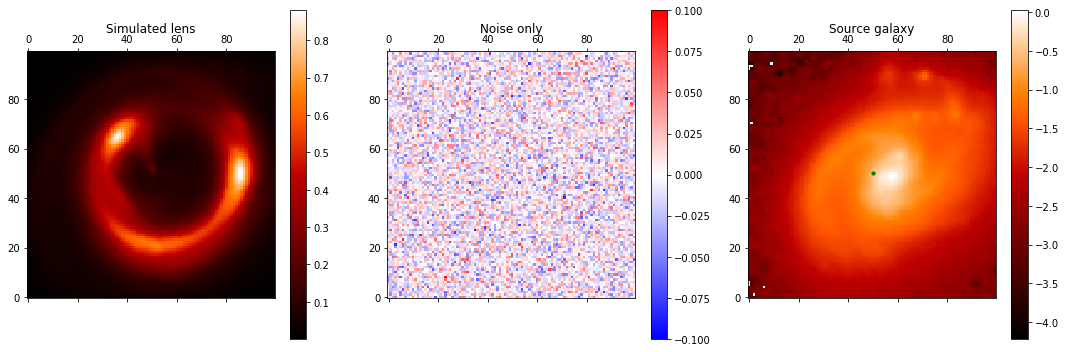

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes[0]
ax.set_title("Simulated lens")
im = ax.matshow(image_no_noise, origin='lower', cmap='gist_heat')
fig.colorbar(im, ax=ax)

ax = axes[1]
ax.set_title("Noise only")
im = ax.matshow(image_sim-image_no_noise, origin='lower', 
                cmap='bwr', vmin=-0.1, vmax=0.1)
fig.colorbar(im, ax=ax)

ax = axes[2]
ax.set_title("Source galaxy")
im = ax.matshow(np.log10(source), origin='lower', cmap='gist_heat')
ax.scatter(num_pix/2., num_pix/2., color='green', marker='.', s=40) # center of the image
fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()